In [1]:
import os
import glob
import subprocess
import sys
import time
#import pims
from IPython.display import display, Image
import matplotlib.pyplot as plt
from os.path import expanduser


home = expanduser("~")
output_dir = os.path.join(home,'scratch/isofit_output')
os.makedirs(os.path.dirname(output_dir), exist_ok=True)
print(output_dir)

/Users/sserbin/scratch/isofit_output


In [2]:
# Grab isofit_prosaild Docker container
os.system("docker pull serbinsh/isofit_containers:isofit_prosaild_master_latest")

0

In [3]:
# check for isofit_prosaild Docker container
#os.system("docker image ls").read()
output = subprocess.check_output("docker image ls", shell=True)
print(output, sep="\t", end="\n")

b'REPOSITORY                       TAG                                              IMAGE ID            CREATED             SIZE\nserbinsh/ctsm_containers         ctsm-fates_next_api-fates_sci.1.23.0_api.7.1.0   13b838241893        2 weeks ago         1.68GB\nelm                              latest                                           7a3cd82e1966        4 weeks ago         1.86GB\n<none>                           <none>                                           710954a8442e        4 weeks ago         1.86GB\n<none>                           <none>                                           0a71d2f10572        4 weeks ago         1.86GB\nserbinsh/elm_containers          baseos-stable-gcc550                             4f7e6dbd13d9        4 weeks ago         1.22GB\nserbinsh/isofit_containers       isofit_prosaild_master_latest                    0a883c84ec2b        4 weeks ago         2.89GB\nisofit_prosaild                  latest                                           29eb43ca

In [4]:
# Setup isofit run options and inputs
docker_name = "serbinsh/isofit_containers:isofit_prosaild_master_latest"
host_output_dir = output_dir
docker_output_dir = "/isofit/examples/20171108_Pasadena/"
print(''.join([host_output_dir,":",docker_output_dir]))
#
examples = "/isofit/examples/20171108_Pasadena"
run_command = ''.join(["/bin/sh -c ","'cd ",examples," && mkdir -p lut ","&& ./run_example_libradtran.sh'"])
print(run_command)

/Users/sserbin/scratch/isofit_output:/isofit/examples/20171108_Pasadena/
/bin/sh -c 'cd /isofit/examples/20171108_Pasadena && mkdir -p lut && ./run_example_libradtran.sh'


In [5]:
# Run
start = time.time()
# run the docker container
os.system(''.join(["docker run --user isofit -v ",host_output_dir,":",docker_output_dir,"output -v ", host_output_dir,"/images:",docker_output_dir,"images -v ",host_output_dir,"/lut:",docker_output_dir,"lut"," ",docker_name," ",run_command]))
# print the run string
print(''.join(["docker run --user isofit -v ",host_output_dir,":",docker_output_dir,"output -v ", host_output_dir,"/images:",docker_output_dir,"images -v ",host_output_dir,"/lut:",docker_output_dir,"lut"," ",docker_name," ",run_command]))
# get runtime
end = time.time()
#Print runtime
print(end - start)

docker run --user isofit -v /Users/sserbin/scratch/isofit_output:/isofit/examples/20171108_Pasadena/output -v /Users/sserbin/scratch/isofit_output/images:/isofit/examples/20171108_Pasadena/images -v /Users/sserbin/scratch/isofit_output/lut:/isofit/examples/20171108_Pasadena/lut serbinsh/isofit_containers:isofit_prosaild_master_latest /bin/sh -c 'cd /isofit/examples/20171108_Pasadena && mkdir -p lut && ./run_example_libradtran.sh'
0.0002448558807373047


In [8]:
# show output frames
images_dir = os.path.join(output_dir,'images')
print(images_dir)

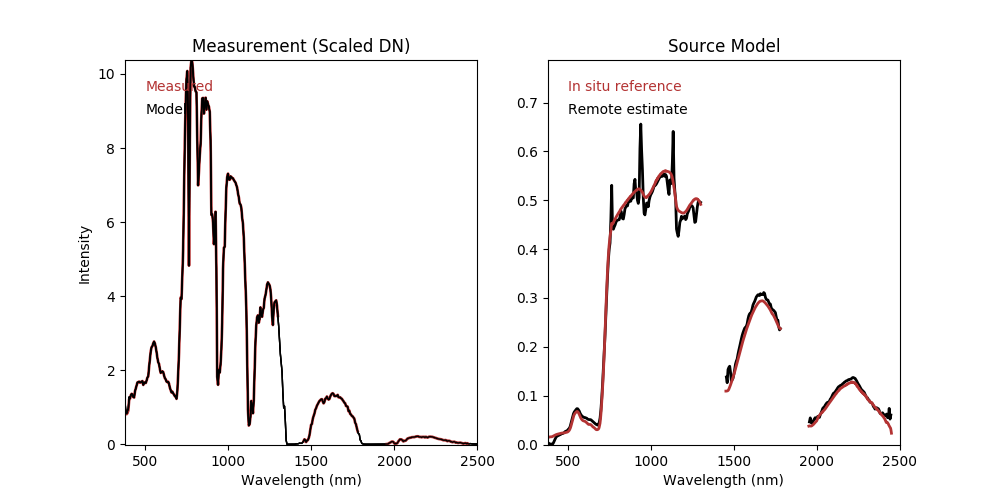

In [9]:
# frame_0
file0 = ''.join([images_dir,"/frame_0.png"])
Image(filename=file0)

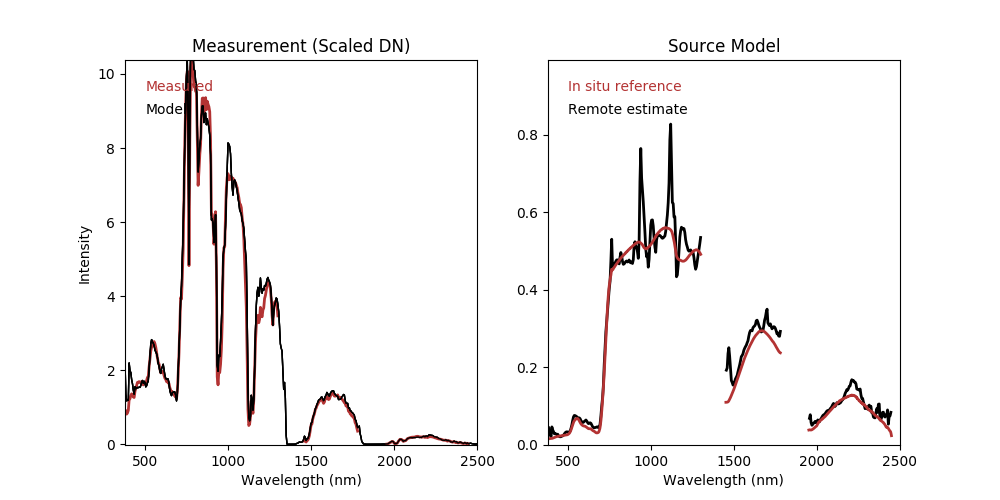

In [10]:
# frame_1
file1 = ''.join([images_dir,"/frame_1.png"])
Image(filename=file1)

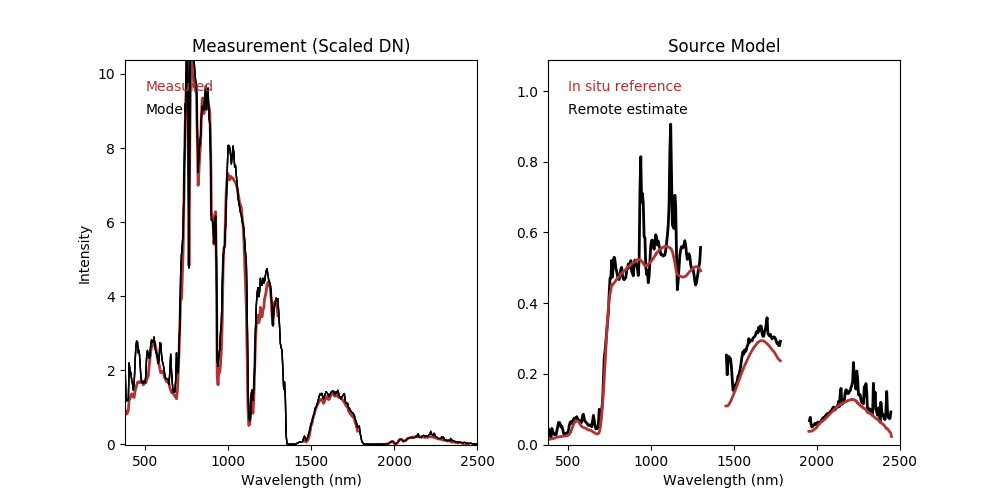

In [11]:
# frame_2
file2 = ''.join([images_dir,"/frame_2.png"])
Image(filename=file2)

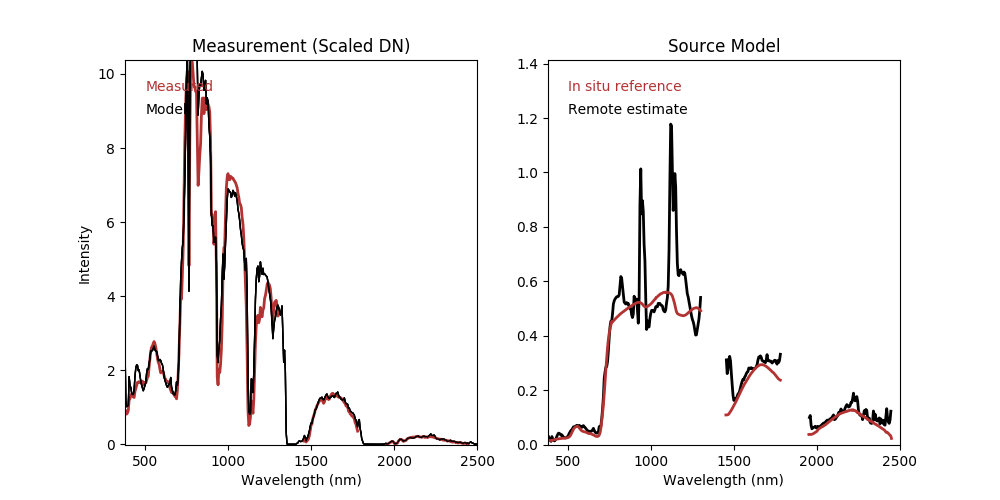

In [12]:
# frame_3
file3 = ''.join([images_dir,"/frame_3.png"])
Image(filename=file3)

/Users/sserbin/scratch/isofit_output/ang20171108t184227_rfl_v2p11_BeckmanLawn-libRadTran.txt


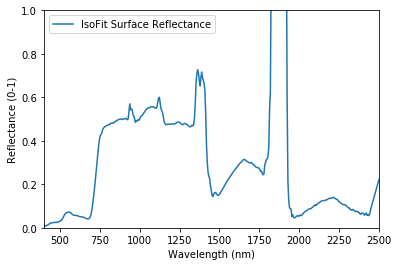

In [13]:
# Plot main reflectance output
for files in glob.glob(os.path.join(output_dir,"*_rfl_*")):
    f = open( files, 'r' )
    file_contents = f.read()
    print(f.name)
    filename_in = f.name
    f.close()
    
f2 = open(filename_in, 'r') 
lines = f2.readlines()
x = []
y = [] 
for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
f2.close() 

plt.plot(x,y, label='IsoFit Surface Reflectance')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (0-1)')
plt.axis([400, 2500, 0, 1])
plt.legend()
plt.show()

/Users/sserbin/scratch/isofit_output/ang20171108t184227_mdl_v2p11_BeckmanLawn-libRadTran.txt


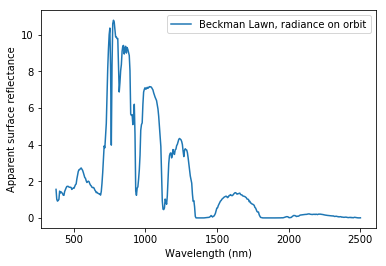

In [14]:
for files in glob.glob(os.path.join(output_dir,"*_mdl_*")):
    f = open( files, 'r' )
    file_contents = f.read()
    print(f.name)
    filename_in = f.name
    f.close()
    
f2 = open(filename_in, 'r') 
lines = f2.readlines()
x = []
y = [] 
for line in lines:
    p = line.split()
    x.append(float(p[0]))
    y.append(float(p[1]))
f2.close() 

plt.plot(x,y, label='Beckman Lawn, radiance on orbit')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Apparent surface reflectance')
plt.legend()
plt.show()